# Heart Diagnosis Using Electrocardiogram Measurements

## HW-Shapes ECE 594N W23
### Authors: [Nima Namazi](mailto:mnamazi@ece.ucsb.edu) & [Monsij Biswal](mailto:mbiswal@ece.ucsb.edu)

- Welcome to the our project notebook !









## Introduction

- According to WHO, cardiovascular diseases are the leading cause of death worldwide
- Electrocardiogram (ECG) is the most common non-invasive technique to represent the electrical activity of a human heart.
- An ECG signal contains several peaks per beat cycle. The distances between these peaks help identify various heart diseases and abnormalities. (been used over 70 years !)

<img src="./assets/ecg_morphology.png" width="400" height="600">

*Figure Source* : [2]



## Dataset
The dataset used for this project is about 12-lead electrocardiogram signals created by Chapman University and Shaoxing People's Hospital [1]. Below are some key aspects of the dataset:

- 12-lead ECG Database consists of arrhythmia research covering more than 10,000 patients. 
- Sampled at 500 Hz for 10 seconds
- Labels include the kinds rhythm and beat abnormalities observed

## 12 Lead ECG Methodology

- Each lead represents an electrical view of the heart from a specific angle, much like from a different perspective. 
- Total of 10 electrodes (one for each limb and six across the chest)
- While the limb electrodes provide vertical views, the chest electrodes generate views in the horizontal plane as shown below. 

Vertical : I, II, III , aVR, aVL, aVF

Horizontal : V1, V2, V3, V4, V5, V6

<img src="./assets/electrodes.png" width="1200" height="1200">

*Figure Source* : https://www.cablesandsensors.com/pages/12-lead-ecg-placement-guide-with-illustrations#1



- | -
- | - 
![alt](./assets/all-views.png) | ![alt](./assets/vertical-leads.gif)
Position of all leads |    Einthoven's Triangle

*Figure Source* : https://www.cablesandsensors.com/pages/12-lead-ecg-placement-guide-with-illustrations#1

## Problem Statement

Can the **correlation** matrices from ECG data, help classify different arrhythmia conditions ?


<font color='blue'>It is worth mentioning that unlike most of the past works which utilize peaks in the ECG waveform, we will solely rely on correlation between 12 leads.</font>


We will focus on 4 arrythmia conditions

<img src="./assets/classes.png" width="800" height="200">


In [1]:
# Loading requirements
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
from data_util import *
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


base_path = './ECGDataDenoisedMat/'

# sample dataset is already included at ./ECGDataDenoisedMat
# https://www.kaggle.com/datasets/erarayamorenzomuten/chapmanshaoxing-12lead-ecg-database/download?datasetVersionNumber=1


patient_id = get_random_patient_id()
sample_data = get_single_data(patient_id=patient_id)
print('Shape of ECG data: ', sample_data.shape)    # number of leads = 12 (rows), samples = 5000 (columns)
print('Some values: ', sample_data[7, 50:55])      # Unit microV

INFO: Using numpy backend


Shape of ECG data:  (12, 5000)
Some values:  [16.138  14.325  12.365  10.238   7.9427]


## Time samples of ECG data

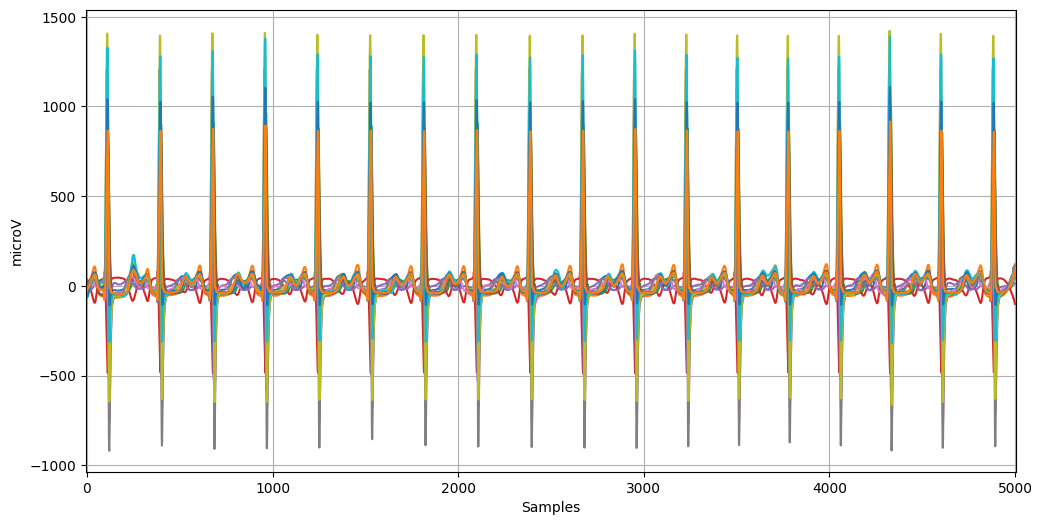

In [2]:
plot_ecg(patient_id=patient_id, lead=-1)

## Visualizing the correlation matrix 

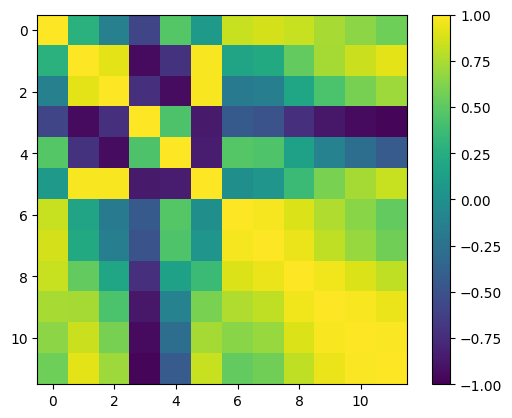

In [3]:
cor_mat = compute_corr_mat(patient_id=patient_id, plot_corr=True)

## Correlation matrices lies on SPD Manifold !

In [4]:
file_paths = get_all_file_paths()
num_files = len(file_paths) 
on_manifold = 0
for file in file_paths:
    cor_mat = compute_corr_mat(file, plot_corr=False)
    if check_on_manifold(cor_mat):
        on_manifold += 1
print("Percentage of correlation matrices on SPD Manifold: {:.2f}".format((on_manifold/num_files)*100))


Percentage of correlation matrices on SPD Manifold: 99.84


## Dataset overview

| Acronym Name | Full Name                                    | Number of instances |
|--------------|----------------------------------------------|---------------------|
| SB           | Sinus Bradycardia                            | 3889                |
| SR           | Sinus Rhythm                                 | 1825                |
| AFIB         | Atrial Fibrillation                          | 1780                |
| ST           | Sinus Tachycardia                            | 1564                |
| AF           | Atrial Flutter                               | 445                 |
| SI           | Sinus Irregularity                           |  ~                  |
| SVT          | Supraventricular Tachycardia                 | 585                 |
| AT           | Atrial Tachycardia                           | 120                 |
| AVNRT        | Atrioventricular  Node Reentrant Tachycardia |  ~                  |
| AVRT         | Atrioventricular Reentrant Tachycardia       | 8                   |
| SAAWR        | Sinus Atrium to Atrial Wandering Rhythm      | ~                   |

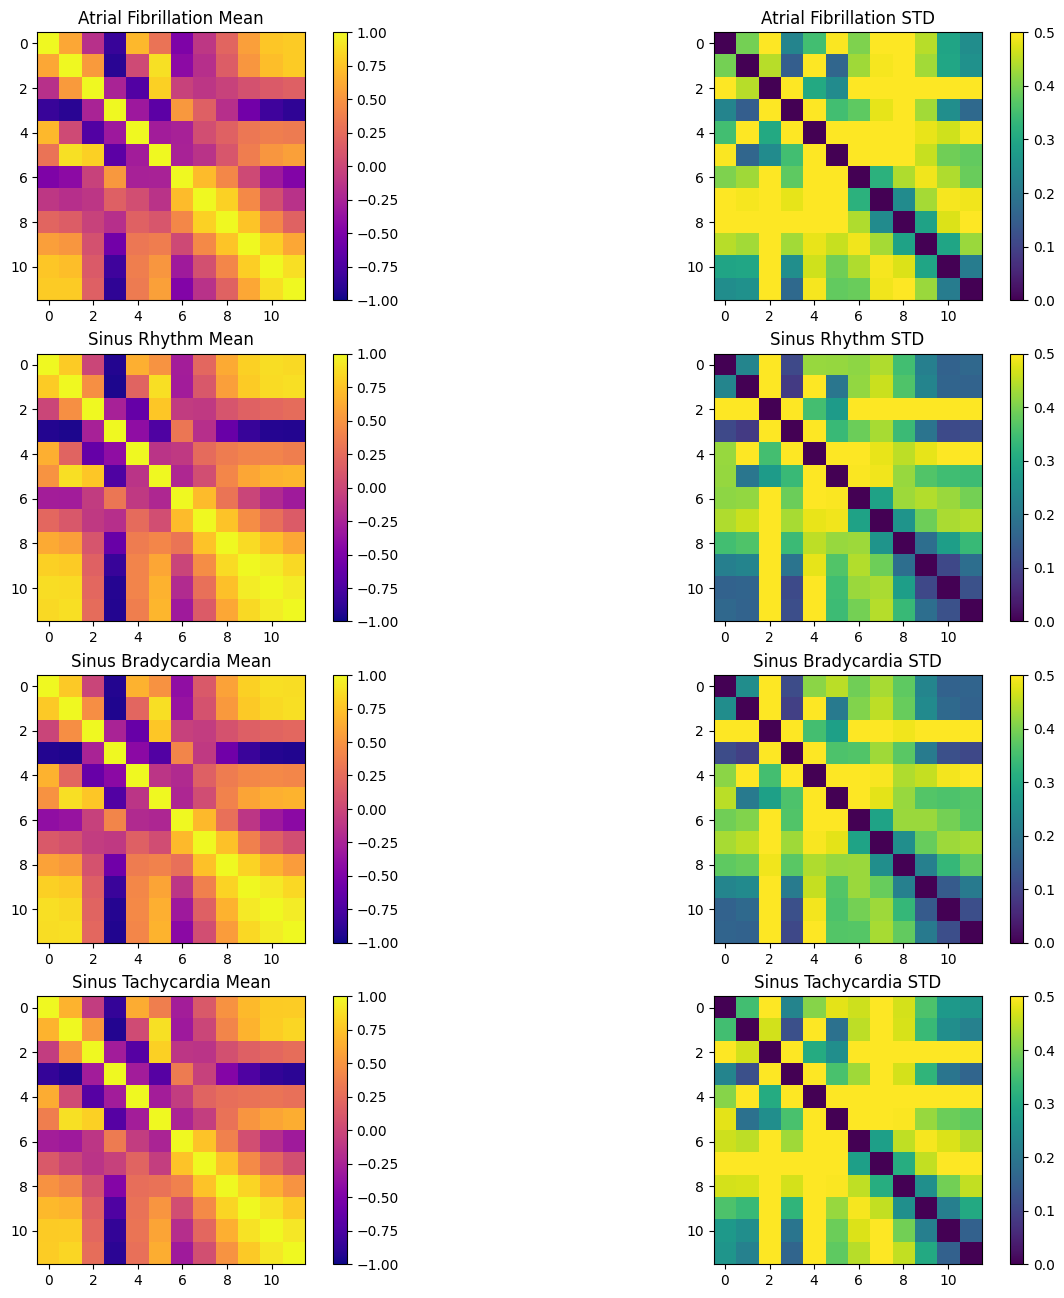

In [5]:
chosen_classes = ["AFIB", "SR", "SB", "ST"]
chosen_classes_names = ["Atrial Fibrillation", "Sinus Rhythm", "Sinus Bradycardia", "Sinus Tachycardia"]

file_paths = get_all_file_paths()

fig = plt.gcf()
fig.set_size_inches(16, 16)
init_labels()


pos = 1
for k in range(4):
    average_corr_matrix = np.zeros(np.shape(cor_mat))
    std_corr_matrix = np.zeros(np.shape(cor_mat))
    num_patients_in_class = 0
    for file in file_paths:
        if get_rhythm_acr(file) == chosen_classes[k]:
            correl_mat = compute_corr_mat(file, plot_corr=False)
            if check_on_manifold(correl_mat):
                num_patients_in_class += 1
                average_corr_matrix += correl_mat
    average_corr_matrix = average_corr_matrix/num_patients_in_class
    plt.subplot(4,2,pos)
    plt.imshow(average_corr_matrix, cmap='plasma', vmin=-1, vmax=1)
    plt.title(chosen_classes_names[k] + " Mean")
    plt.colorbar()
    for file in file_paths:
        if get_rhythm_acr(file) == chosen_classes[k]:
            correl_mat = compute_corr_mat(file, plot_corr=False)
            if check_on_manifold(correl_mat):
                std_corr_matrix += np.square((correl_mat - average_corr_matrix))
    plt.subplot(4,2,pos+1)
    plt.imshow(np.sqrt(std_corr_matrix/num_patients_in_class), cmap='viridis', vmax = 0.5, vmin = 0)
    plt.title(chosen_classes_names[k] + " STD")
    plt.colorbar()
    pos +=2

plt.show() 

            
            

## Average correlation heatmap and standard deviations per class

- Sinus Rhythm and Sinus Bradycardia have fairly similar mean and standard deviation heatmaps (subtle differences for example bottom left of the mean heatmap)

- Atrial Fibrillation and Atrial Tachycardia have unique mean and standard deviation heatmaps when compared with the rest.

## Dataset Loading

In [6]:
#Loaded needed ML packages and data
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
from data_util import *
from geomstats.geometry.spd_matrices import SPDMatrices
from geomstats.learning.preprocessing import ToTangentSpace
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

spd_manifold = SPDMatrices(n=12)

#recommended: load_sample = False
mat, all_ids, targets = load_Chapman_ECG(balanced=True, load_sample=True)
mat = np.asarray(mat)
print("Shape of loaded ECG Data: ", mat.shape)

#Splitting dataset for generating train and test sets

X = mat
y = targets
X_train, X_test, y_train, y_test = train_test_split(X, y)

Loading sample denoised dataset of Chapman Shaoxing 12-lead ECG Data...
Using cached ./ECGDataDenoisedMat/
Balanced = True


100%|███████████████████████████████████████████████████████████████████████████| 10606/10606 [00:20<00:00, 510.09it/s]

Shape of loaded ECG Data:  (6256, 12, 12)


## Classification on the tangent space

### 1. Logistic Regression

In [7]:
#Logistic regression with tangent space method
from sklearn.model_selection import GridSearchCV
import pickle

lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("standardscaler", StandardScaler()),
        ("classifier", LogisticRegression(max_iter=10000)),
    ]
)

grid_values = {'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'classifier__solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


filename = 'LR_finalized_model.sav'

if os.path.isfile(filename):
    LR_search = pickle.load(open(filename, 'rb'))
else:
    LR_search = GridSearchCV(lr_pipeline, grid_values, cv=3)
    LR_search.fit(X_train, y_train)
    
    pickle.dump(LR_search, open(filename, 'wb'))
    
print(LR_search.best_params_)
print("Accuracy:{:.2f} ".format(LR_search.score(X_test, y_test)))

probs = LR_search.predict_proba(X_test)
n = 2 
top_n = np.argsort(probs)[:, :-n-1:-1]
class_to_index = {"AFIB":0, "SB":1, "SR":2, "ST":3}

true_preds = 0
for i in range(len(y_test)):
    if class_to_index[y_test[i]] in top_n[i]:
        true_preds += 1

print('Top n accuracy for n={} : {:.2f}'.format(n, true_preds/len(y_test)))

{'classifier__C': 100.0, 'classifier__solver': 'newton-cg'}
Accuracy:0.48 
Top n accuracy for n=2 : 0.75


In [8]:
#Confusion matrix for logistic regression with tangent space method

from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = LR_search.predict(X_test)

get_confusion_matrix(y_test, y_pred, target_class_list=['SR','SB', 'ST', 'AFIB'])

,pred:SR,pred:SB,pred:ST,pred:AFIB
true:SR,0.394,0.220,0.247,0.139
true:SB,0.239,0.460,0.134,0.167
true:ST,0.214,0.143,0.434,0.209
true:AFIB,0.082,0.142,0.162,0.614


### 2. Support Vector Machine

In [9]:
#SVM classifier with tangent space method
from sklearn.svm import SVC

lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("standardscaler", StandardScaler()),
        ("classifier", SVC(probability=True)),
    ]
)

grid_values = {'classifier__C': [0.001, 0.01, 0.1, 1, 10],
              'classifier__kernel': ['linear','poly', 'rbf', 'sigmoid'],
              'classifier__degree': [2, 3, 4]}


filename = 'SVM_finalized_model.sav'

if os.path.isfile(filename):
    SVM_search = pickle.load(open(filename, 'rb'))
else:
    SVM_search = GridSearchCV(lr_pipeline, grid_values, cv=3)
    SVM_search.fit(X_train, y_train)
    
    pickle.dump(SVM_search, open(filename, 'wb'))
    
print(SVM_search.best_params_)
print("Accuracy:{:.2f} ".format(SVM_search.score(X_test, y_test)))
    
probs = SVM_search.predict_proba(X_test)
n = 2 
top_n = np.argsort(probs)[:, :-n-1:-1]
class_to_index = {"AFIB":0, "SB":1, "SR":2, "ST":3}

true_preds = 0
for i in range(len(y_test)):
    if class_to_index[y_test[i]] in top_n[i]:
        true_preds += 1

print('Top n accuracy for n={} : {:.2f}'.format(n, true_preds/len(y_test)))

{'classifier__C': 10, 'classifier__degree': 2, 'classifier__kernel': 'linear'}
Accuracy:0.47 
Top n accuracy for n=2 : 0.75


In [10]:
#Confusion matrix for SVM with tangent space method

from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = SVM_search.predict(X_test)

get_confusion_matrix(y_test, y_pred, target_class_list=['SR','SB', 'ST', 'AFIB'])

,pred:SR,pred:SB,pred:ST,pred:AFIB
true:SR,0.379,0.212,0.258,0.152
true:SB,0.249,0.435,0.137,0.179
true:ST,0.217,0.135,0.407,0.242
true:AFIB,0.087,0.134,0.134,0.644


### 3. Random Forest

In [11]:
#Random forest classifier with tangent space method

# To use the saved model "RF_finalized_model.sav", please download from
# https://drive.google.com/file/d/1zUVxjV1phOhIk7WysYp-6xJfmpNivxkT/view?usp=share_link
# and place it in the notebook path (same as the other models)
from sklearn.ensemble import RandomForestClassifier

lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("standardscaler", StandardScaler()),
        ("classifier", RandomForestClassifier()),
    ]
)

grid_values = {'classifier__n_estimators': [10, 100, 1000],
              'classifier__criterion': ['gini', 'entropy', 'log_loss']}


filename = 'RF_finalized_model.sav'

if os.path.isfile(filename):
    RF_search = pickle.load(open(filename, 'rb'))
else:
    RF_search = GridSearchCV(lr_pipeline, grid_values, cv=3)
    RF_search.fit(X_train, y_train)
    
    pickle.dump(RF_search, open(filename, 'wb'))

print(RF_search.best_params_)
print("Accuracy:{:.2f} ".format(RF_search.score(X_test, y_test)))

probs = RF_search.predict_proba(X_test)
n = 2 
top_n = np.argsort(probs)[:, :-n-1:-1]
class_to_index = {"AFIB":0, "SB":1, "SR":2, "ST":3}

true_preds = 0
for i in range(len(y_test)):
    if class_to_index[y_test[i]] in top_n[i]:
        true_preds += 1

print('Top n accuracy for n={} : {:.2f}'.format(n, true_preds/len(y_test)))

{'classifier__criterion': 'entropy', 'classifier__n_estimators': 1000}
Accuracy:0.40 
Top n accuracy for n=2 : 0.67


In [12]:
#Confusion matrix for random forest with tangent space method

from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = RF_search.predict(X_test)

get_confusion_matrix(y_test, y_pred, target_class_list=['SR','SB', 'ST', 'AFIB'])

,pred:SR,pred:SB,pred:ST,pred:AFIB
true:SR,0.328,0.280,0.255,0.136
true:SB,0.343,0.336,0.157,0.164
true:ST,0.239,0.126,0.327,0.308
true:AFIB,0.119,0.159,0.139,0.582


### 4. Adaboost Classifier

In [13]:
#Adaboost classifier with tangent space method
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("standardscaler", StandardScaler()),
        ("classifier", AdaBoostClassifier(n_estimators=200, learning_rate=0.5)),
    ]
)

grid_values = {'classifier__n_estimators': [25, 50, 100, 1000],
              'classifier__learning_rate': [1e-6, 1e-4, 1e-2, 1, 5, 10]}



filename = 'AB_finalized_model.sav'

if os.path.isfile(filename):
    AB_search = pickle.load(open(filename, 'rb'))
else:
    AB_search = GridSearchCV(lr_pipeline, grid_values, cv=3)
    AB_search.fit(X_train, y_train)
    
    pickle.dump(AB_search, open(filename, 'wb'))
    
print(AB_search.best_params_)
print("Accuracy:{:.2f} ".format(AB_search.score(X_test, y_test)))
    
probs = AB_search.predict_proba(X_test)
n = 2 
top_n = np.argsort(probs)[:, :-n-1:-1]
class_to_index = {"AFIB":0, "SB":1, "SR":2, "ST":3}

true_preds = 0
for i in range(len(y_test)):
    if class_to_index[y_test[i]] in top_n[i]:
        true_preds += 1

print('Top n accuracy for n={} : {:.2f}'.format(n, true_preds/len(y_test)))

{'classifier__learning_rate': 0.01, 'classifier__n_estimators': 1000}
Accuracy:0.38 
Top n accuracy for n=2 : 0.65


In [14]:
#Confusion matrix for Adaboost with tangent space method

from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = AB_search.predict(X_test)

get_confusion_matrix(y_test, y_pred, target_class_list=['SR','SB', 'ST', 'AFIB'])

,pred:SR,pred:SB,pred:ST,pred:AFIB
true:SR,0.366,0.235,0.222,0.177
true:SB,0.289,0.333,0.194,0.184
true:ST,0.220,0.143,0.324,0.313
true:AFIB,0.147,0.162,0.194,0.498


### 5. Multi-layer perceptron

In [15]:
#MLP classifier with tangent space method

from sklearn.neural_network import MLPClassifier

lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("standardscaler", StandardScaler()),
        ("classifier", MLPClassifier(hidden_layer_sizes=(30,30,30,30),max_iter=10000)),
    ]
)


#test
grid_values = {'classifier__alpha': [0.001,0.01,0.1,1,10,100,1000],
              'classifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
              'classifier__hidden_layer_sizes': [(30,),(30,30,), (30,30,30,)]}


filename = 'MLP_finalized_model.sav'

if os.path.isfile(filename):
    MLP_search = pickle.load(open(filename, 'rb'))
else:
    MLP_search = GridSearchCV(lr_pipeline, grid_values, cv=3)
    MLP_search.fit(X_train, y_train)
    
    pickle.dump(MLP_search, open(filename, 'wb'))
    
print(MLP_search.best_params_)
print("Accuracy:{:.2f} ".format(MLP_search.score(X_test, y_test)))

probs = MLP_search.predict_proba(X_test)
n = 2 
top_n = np.argsort(probs)[:, :-n-1:-1]
class_to_index = {"AFIB":0, "SB":1, "SR":2, "ST":3}

true_preds = 0
for i in range(len(y_test)):
    if class_to_index[y_test[i]] in top_n[i]:
        true_preds += 1

print('Top n accuracy for n={} : {:.2f}'.format(n, true_preds/len(y_test)))

{'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (30,), 'classifier__learning_rate': 'adaptive'}
Accuracy:0.45 
Top n accuracy for n=2 : 0.73


In [16]:
#Confusion matrix for MLP with tangent space method

from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = MLP_search.predict(X_test)

get_confusion_matrix(y_test, y_pred, target_class_list=['SR','SB', 'ST', 'AFIB'])

,pred:SR,pred:SB,pred:ST,pred:AFIB
true:SR,0.343,0.301,0.225,0.131
true:SB,0.281,0.433,0.149,0.137
true:ST,0.250,0.135,0.398,0.217
true:AFIB,0.067,0.159,0.164,0.609


### 6. K-Nearest Neighbors (k-NN)

In [17]:
#KNN classifier with tangent space method
from sklearn.neighbors import KNeighborsClassifier

lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("standardscaler", StandardScaler()),
        ("classifier", KNeighborsClassifier(algorithm='brute')),
    ]
)

grid_values = {'classifier__n_neighbors': [5, 10, 20],
              'classifier__weights': ['uniform', 'distance']}

search = GridSearchCV(lr_pipeline, grid_values, cv=3)


filename = 'KNN_finalized_model.sav'

if os.path.isfile(filename):
    KNN_search = pickle.load(open(filename, 'rb'))
else:
    KNN_search = GridSearchCV(lr_pipeline, grid_values, cv=3)
    KNN_search.fit(X_train, y_train)
    
    pickle.dump(KNN_search, open(filename, 'wb'))

print(KNN_search.best_params_)
print("Accuracy:{:.2f} ".format(KNN_search.score(X_test, y_test)))
    
probs = KNN_search.predict_proba(X_test)
n = 2 
top_n = np.argsort(probs)[:, :-n-1:-1]
class_to_index = {"AFIB":0, "SB":1, "SR":2, "ST":3}

true_preds = 0
for i in range(len(y_test)):
    if class_to_index[y_test[i]] in top_n[i]:
        true_preds += 1

print('Top n accuracy for n={} : {:.2f}'.format(n, true_preds/len(y_test)))

{'classifier__n_neighbors': 20, 'classifier__weights': 'distance'}
Accuracy:0.37 
Top n accuracy for n=2 : 0.63


In [18]:
#Confusion matrix for KNN with tangent space method

from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = KNN_search.predict(X_test)

get_confusion_matrix(y_test, y_pred, target_class_list=['SR','SB', 'ST', 'AFIB'])

,pred:SR,pred:SB,pred:ST,pred:AFIB
true:SR,0.338,0.255,0.205,0.202
true:SB,0.353,0.316,0.127,0.204
true:ST,0.250,0.168,0.261,0.321
true:AFIB,0.127,0.172,0.152,0.550


## Comparison of classification algorithms

| Algorithm           | top-1 accuracy | top-2 accuracy |
|---------------------|----------------|----------------|
| Logistic Regression |      0.48      |     0.74       |
| SVM                 |      0.47      |     0.75       |
| Random Forest       |      0.40      |     0.67       |
| Adaboost            |      0.38      |     0.65       |
| MLP                 |      0.45      |     0.73       |
| k-NN                |      0.37      |     0.63       |

## Classification on the SPD manifold

### Minimum Distance to Mean

In [19]:
#Minimum Distance to Mean (MDM) classification
import geomstats
from geomstats.learning.mdm import RiemannianMinimumDistanceToMean
from geomstats.geometry.spd_matrices import *


#spd_manifold = SPDMatrices(n=12)
riemannian_metrics = [SPDLogEuclideanMetric(n=12),
                      SPDEuclideanMetric(n=12),
                      SPDBuresWassersteinMetric(n=12),
                      SPDAffineMetric(n=12)]


for metric in riemannian_metrics:
    mdm = RiemannianMinimumDistanceToMean(
        riemannian_metric=metric)
    mdm.fit(X_train, np.array(y_train))
    print(str(metric).split(' ')[0][1:])
    print("Score: {:.2f}\n".format(mdm.score(X_test, y_test)))
    
#print(spd_manifold.belongs(mdm.mean_estimates_))


geomstats.geometry.spd_matrices.SPDLogEuclideanMetric
Score: 0.43

geomstats.geometry.spd_matrices.SPDEuclideanMetric
Score: 0.39

geomstats.geometry.spd_matrices.SPDBuresWassersteinMetric
Score: 0.40

geomstats.geometry.spd_matrices.SPDAffineMetric
Score: 0.40



## Using unsupervised learning for classification


### 1. Tangent space K-means

In [22]:
# Tangent space K-means
from sklearn.cluster import KMeans

spd_manifold = SPDMatrices(n=12)

lr_pipeline = Pipeline(
    steps=[
        ("trick_tangent_space", ToTangentSpace(geometry=spd_manifold.metric)),
        ("standardscaler", StandardScaler()),
        ("clustering", KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_pipeline.fit(X_train)
predicted_labels = lr_pipeline.predict(X_test)

# get unique count
pred_class_instance_count = []
for i in range(4):
    pred_class_instance_count.append(np.count_nonzero(predicted_labels==i))

print(pred_class_instance_count)

[419, 317, 588, 240]


### 2. Riemannian K-means

In [23]:
# Riemannian K-means ie unsupervised learning
from geomstats.learning.kmeans import RiemannianKMeans
from geomstats.geometry.spd_matrices import *
spd_manifold = SPDMatrices(n=12)

kmeans = RiemannianKMeans(spd_manifold.metric, n_clusters = 4, tol=1e-3, init_step_size=1.0)

centroids = kmeans.fit(X_train)
spd_manifold.belongs(centroids)

predicted_labels = kmeans.predict(X_test)

# get unique count
pred_class_instance_count = []
for i in range(4):
    pred_class_instance_count.append(np.count_nonzero(predicted_labels==i))

print(pred_class_instance_count)  # but we dont know which class got assigned to which cluster

[290, 385, 376, 513]


## Conclusion

- MLP, SVM, and logistic regression attain highest accuracy scores among the tangent space methods while for the method on the manifold, log euclidean metric performed the best.
- Correlation matrices provide moderately accurate information to diagnose specific heart conditions (such as AFIB)
- Timing information is lost while computing correlation which results in confusion between SB, SR, and ST.

## Future works

- Incorporating correlation data with features such as waveform peaks to improve accuracy
- Utilize a more diverse dataset -> expanding classification classes

## References

[1] Zheng, Jianwei, Jianming Zhang, Sidy Danioko, Hai Yao, Hangyuan Guo, and Cyril Rakovski. “A 12-Lead Electrocardiogram Database for Arrhythmia Research Covering More than 10,000 Patients.” Scientific Data 7, no. 1 (February 12, 2020): 48. https://doi.org/10.1038/s41597-020-0386-x.

[2] Aziz, Saira, Sajid Ahmed, and Mohamed-Slim Alouini. "ECG-based machine-learning algorithms for heartbeat classification." Scientific reports 11, no. 1 (2021): 18738.